In [215]:
## required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
class SoccerDataset(object):
    def __init__(self):
        self.DATA_DIR='data/SoccerData.xlsx'
        self.sheet='All Data'
        self.data=self.load_data()
    #load data
    def load_data(self):
        data = pd.read_excel(self.DATA_DIR, self.sheet, index_col=None)#reading data in particular sheet 'All Data'
        return data
    
    ##get list of column names
    def getColumns(self):
        return self.data.columns
    
    ##shows non null value caount and data type per column 
    def getDataInfo(self):
        return self.data.info()

In [ ]:
#Loading Data
SoccerDataset=SoccerDataset()
data=SoccerDataset.data

In [161]:
## get columns
SoccerDataset.getColumns()

Index(['league', 'teams_no', 'date', 'home_team', 'away_team', 'home_odd',
       'draw_odd', 'away_odd', 'h_played', 'a_played', 'ph_ladder5',
       'ph_ladder4', 'ph_ladder3', 'ph_ladder2', 'ph_ladder1', 'h_ladder',
       'pa_ladder5', 'pa_ladder4', 'pa_ladder3', 'pa_ladder2', 'pa_ladder1',
       'a_ladder', 'h_won', 'h_drawn', 'h_lost', 'h_scored', 'h_conced',
       'h_points', 'a_won', 'a_drawn', 'a_lost', 'a_scored', 'a_conced',
       'a_points', 'h_ladder_h', 'h_played_h', 'h_won_h', 'h_drawn_h',
       'h_lost_h', 'h_scored_h', 'h_conced_h', 'h_points_h', 'a_ladder_a',
       'a_played_a', 'a_won_a', 'a_drawn_a', 'a_lost_a', 'a_scored_a',
       'a_conced_a', 'a_points_a', 'h_form', 'a_form', 'h_elo', 'a_elo',
       'h_offensiv', 'h_defensiv', 'a_offensiv', 'a_defensiv', 'h_clean',
       'a_clean', 'h_fail', 'a_fail', 'h_clean_h', 'a_clean_a', 'h_fail_h',
       'a_fail_a', 'h_goal_signal', 'a_goal_signal', 'Ladder_signal', 'RESULT',
       'h_final', 'a_final', 'h_half',

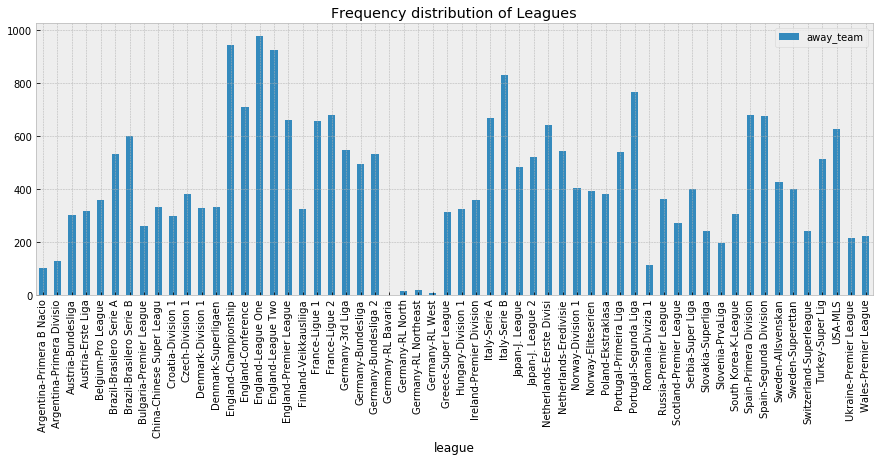

In [226]:
fig, ax = plt.subplots(figsize=(15, 5))
data.groupby('league').count()[['home_team']].plot.bar(
                      ax=ax,
                      title="Frequency distribution of Leagues over teams")
plt.show()

In [214]:
## get info about data
SoccerDataset.getDataInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24830 entries, 0 to 24829
Data columns (total 81 columns):
league           24830 non-null int8
teams_no         24830 non-null int64
date             24830 non-null int16
home_team        24830 non-null int16
away_team        24830 non-null int16
home_odd         24830 non-null float64
draw_odd         24830 non-null float64
away_odd         24830 non-null float64
h_played         24830 non-null int64
a_played         24830 non-null int64
ph_ladder5       24830 non-null int64
ph_ladder4       24830 non-null int64
ph_ladder3       24830 non-null int64
ph_ladder2       24830 non-null int64
ph_ladder1       24830 non-null int64
h_ladder         24830 non-null int64
pa_ladder5       24830 non-null int64
pa_ladder4       24830 non-null int64
pa_ladder3       24830 non-null int64
pa_ladder2       24830 non-null int64
pa_ladder1       24830 non-null int64
a_ladder         24830 non-null int64
h_won            24830 non-null int64
h_drawn     

In [211]:
## to check distribution of each categorical features we should define data type to appropriate value.
##Here I am casting data type of all categorical features to int16 except RESULT column.
## Because later, I will replace the values of target column to fixed number to indicate WIN, LOSS and DRAW
data['league'] =data['league'].astype('category').cat.codes
data['home_team'] =data['home_team'].astype('category').cat.codes
data['away_team'] =data['away_team'].astype('category').cat.codes
data['date'] =data['date'].astype('category').cat.codes

In [277]:
## lets split data based on result feature to explore probability of winning if home or away team

data['RESULT'] = data['RESULT'].replace(['HOME'], 'WIN')#win
data['RESULT'] = data['RESULT'].replace(['AWAY'], 'LOSS')#loss
data['RESULT'] = data['RESULT'].replace(['DRAW'], 'DRAW')#draw

data['RESULT'].head()

0    DRAW
1    DRAW
2     WIN
3    DRAW
4     WIN
Name: RESULT, dtype: object

In [284]:
## lets split data based on result feature to explore probability of winning if home or away team
# score_data_home = data[data['RESULT'] == 'HOME'] ##only home 
data['RESULT'] = data['RESULT'].replace(['HOME'], 'LOSS')
data['RESULT'] = data['RESULT'].replace(['AWAY'], 'WIN')
data['RESULT'] = data['RESULT'].replace(['DRAW'], 'DRAW')
data['RESULT'].head()

0    DRAW
1    DRAW
2    LOSS
3    DRAW
4    LOSS
Name: RESULT, dtype: object

In [230]:
data.head()

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H,Unnamed: 79,Unnamed: 80
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,2.97,3.24,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,3.25,4.69,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,3.52,4.14,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,3.06,2.91,19,19,...,2.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,3.21,4.20,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN


<b>Relationship of playing at Home or Away with Result</b>

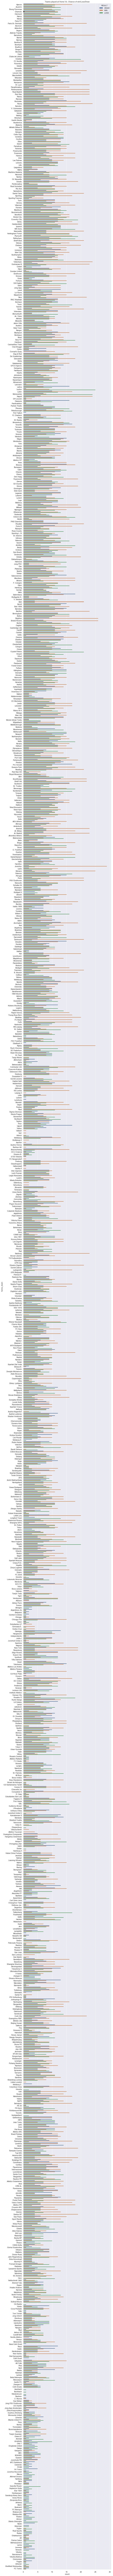

In [281]:
# data=data.loc[data['RESULT'] == 'HOME']
sns.set(rc={'figure.figsize':(10,300)})
ax=sns.countplot(y='home_team',hue='RESULT',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.01, patch_height+3))
plt.title("Teams played at Home Vs. Chance of win/Loss/Draw")
plt.show()

Here, class HOME means WIN 

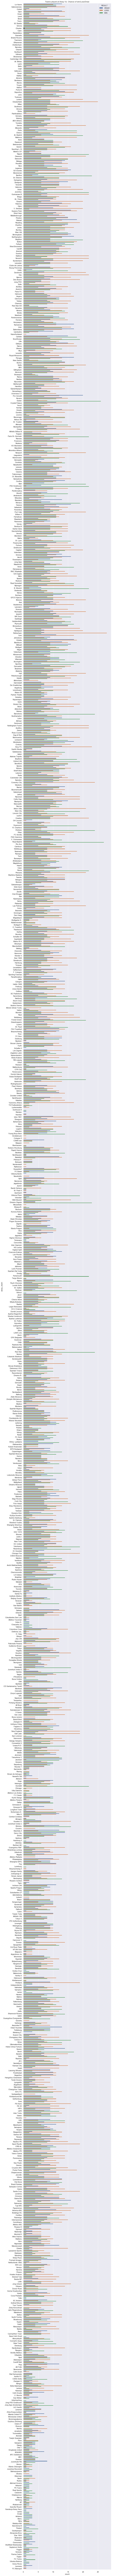

In [285]:
sns.set(rc={'figure.figsize':(10,300)})
ax=sns.countplot(y='away_team',hue='RESULT',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.title("Teams played at Away Vs. Chance of win/Loss/Draw")
plt.show()

From the above two plots, we can see that playing at home (one with orange color) has great chance to win than playing away(one with green color).

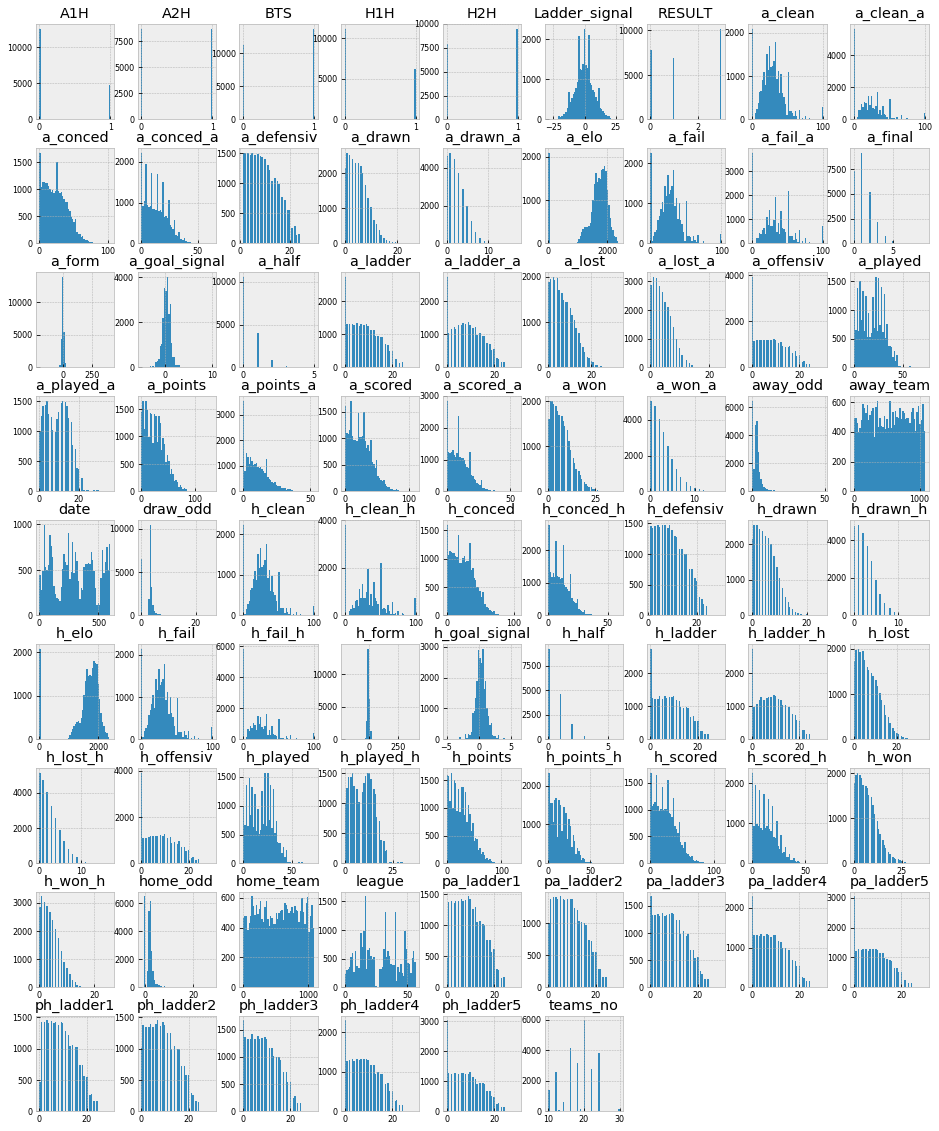

In [212]:
_=data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

As we can see from the above distribution plot, most of features in the same group has same distribution. For example pa_ladder 1,2,3,4,5 with ph_ladder 1,2,3,4,5. So,we can merge the features.

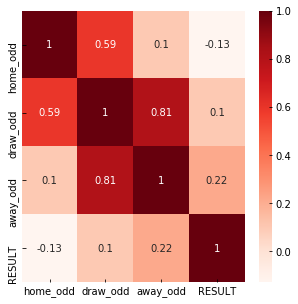

In [171]:
#Using Pearson Correlation
plt.figure(figsize=(5,5))
cor=data[['home_odd','draw_odd','away_odd','RESULT']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

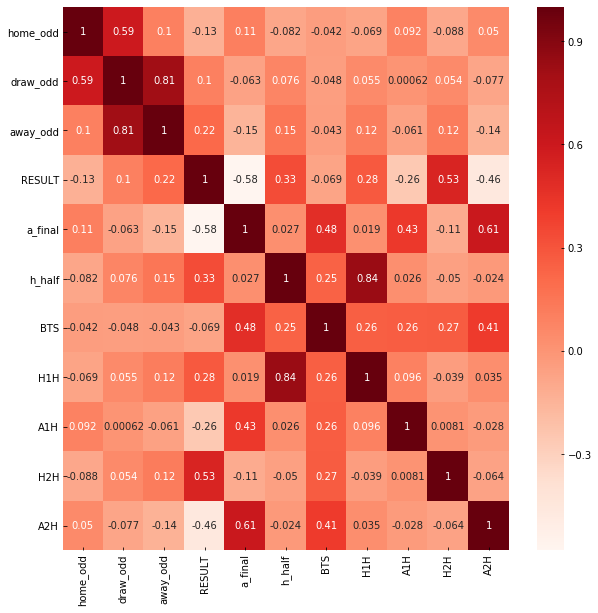

In [172]:
#Lets explore more about corelation with other final result values
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor=data[['home_odd','draw_odd','away_odd','RESULT']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [319]:
#Teams played more than 10 games
played_teams_count = data['home_team'].value_counts()
no_game_played=[]
most_played_teams=[]
for i,team in zip(played_teams_count.index,played_teams_count.values):
    if team>10:
            no_game_played.append(team)
            most_played_teams.append(i)
soccer_data=pd.DataFrame({'Team':most_played_teams,'GameCount':no_game_played})
soccer_data.tail(20) ##to check it only includes game count greater than 10. N:B: the data is decendingly sorted.

,Team,GameCount
856,Betis,12
857,Como,12
858,Zweigen K,12
859,Ponferradina,12
860,Roasso K,12
861,Zwiegen K,12
862,Mafra,12
863,Airbus UK,12
864,Daegu,11
865,Juventude RS,11


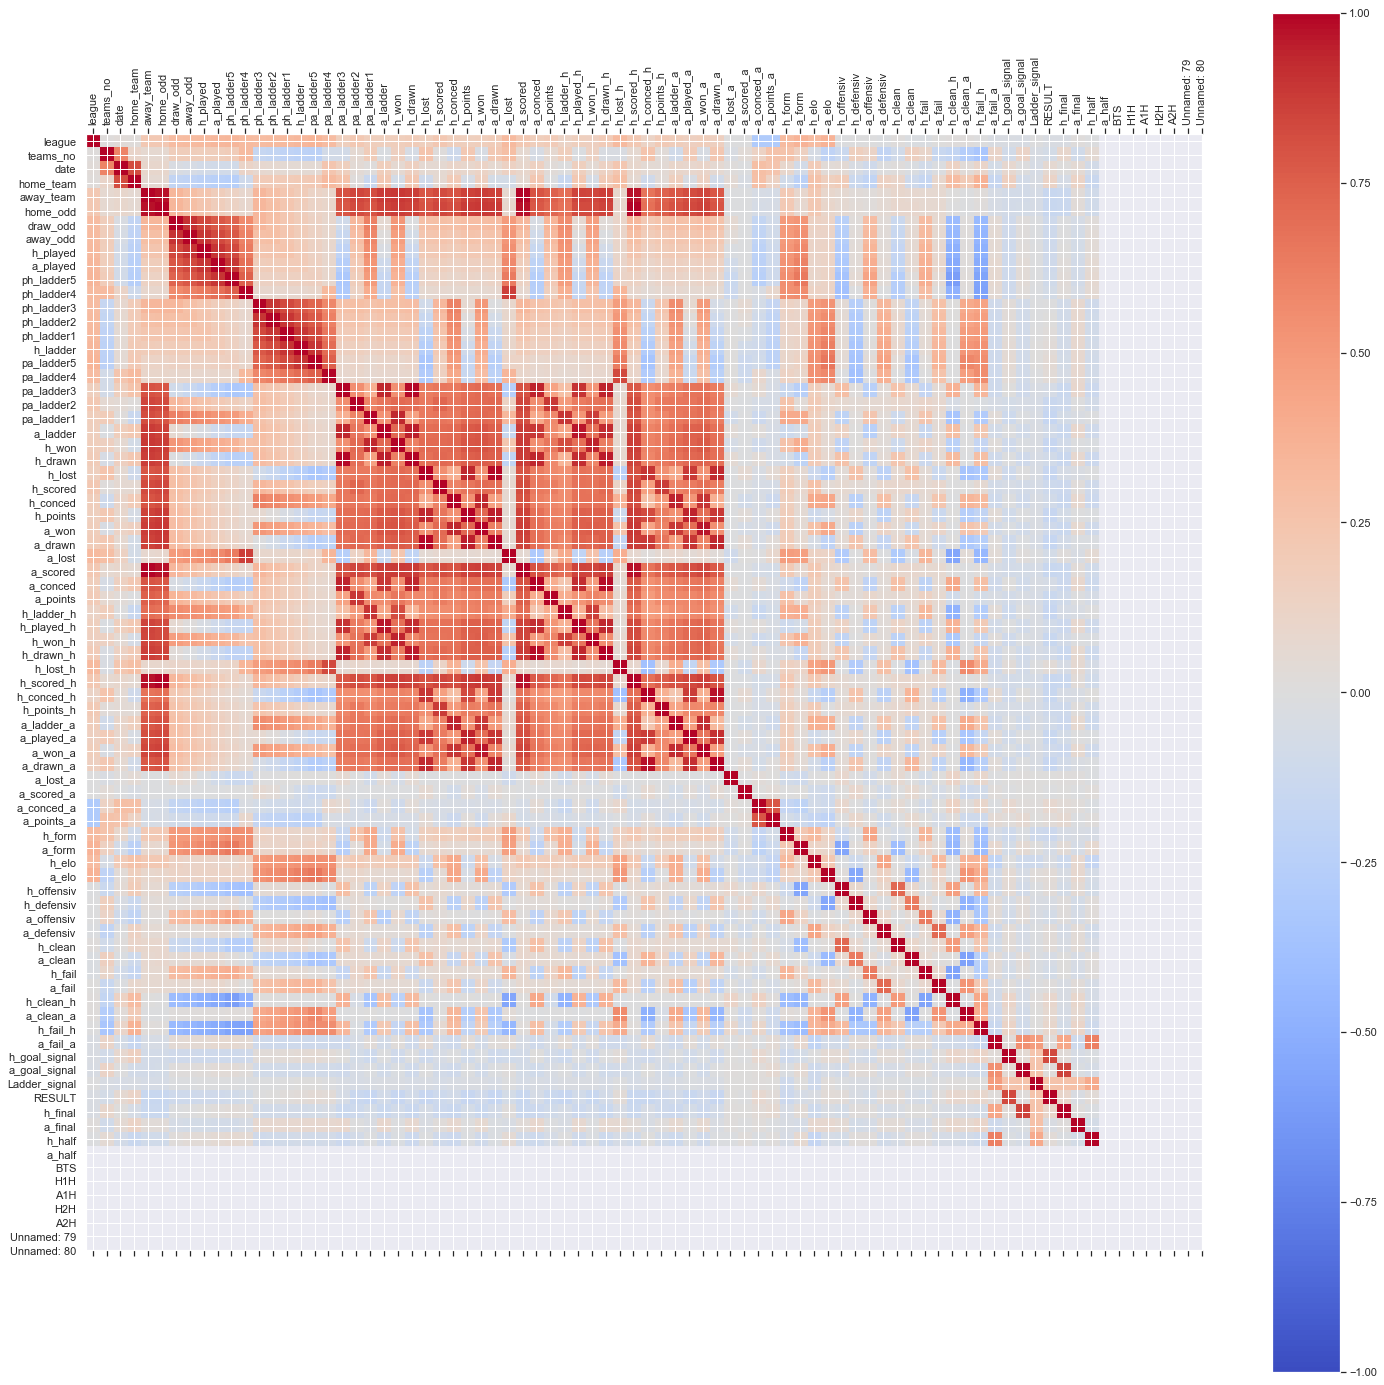

In [320]:
import numpy as np
corr = data.corr()
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

From the above correlation matrix when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation. The matrix gives as interesting focus to drop or retain features and which features has great impact. But before decision we should resample the data to minimize influence of outliers.

AWAY: 10194
HOME: 7756
DRWAN: 6880


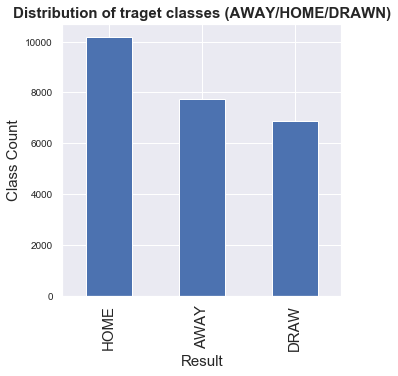

In [298]:
target_count = data.RESULT.value_counts()
print('AWAY:', target_count[0])
print('HOME:', target_count[1])
print('DRWAN:', target_count[2])
fig, ax = plt.subplots(figsize=(5, 5))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Result', fontsize=15)
ax.set_ylabel('Class Count' , fontsize=15)
ax.set_title('Distribution of traget classes (AWAY/HOME/DRAWN)', fontsize=15, fontweight='bold')
_=target_count.plot(ax=ax, kind='bar')

In [ ]:
##As we can see from the result, data distribution for AWAY, HOME and DROWN is relatively unballanced so I have to consider 
## ballancing mechanisims appropriate to the problem. Lets use ... approach because of 